# Loading the dataset and importing required libaries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/nairaland-news-headlines-dataset.csv")

In [ ]:
!pip install nltk

In [ ]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
raw_dataset.head()

,headline,link,category
0,A Total Ban On The Use Of Ethnic Slurs On Nair...,/7631314/total-ban-use-ethnic-slurs,politics
1,UK Court Rejects Ozekhome’s Request To Transfe...,/8519537/uk-court-rejects-ozekhomes-request,politics
2,No Going Back On Biafra – MASSOB Declares Afte...,/8519500/no-going-back-biafra-massob,politics
3,Oseni Rufai Calls Out Double Standards Of Tinu...,/8519558/oseni-rufai-calls-out-double,politics
4,Bandits Openly Display Ammunition During Peace...,/8519473/bandits-openly-display-ammunition-during,politics


In [ ]:
raw_dataset['category'].value_counts()

,count
category,
politics,1218
sports,1085
business,1011
tv-movies,865
music-radio,856
education,704


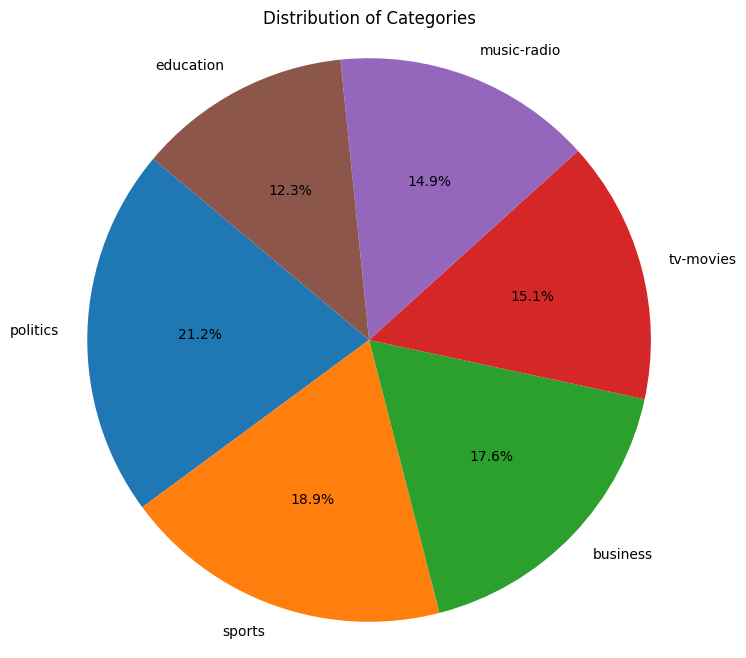

In [ ]:
category_counts = raw_dataset['category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Data Cleaning and Preprocessing

Dropping rows missing headlines

In [ ]:
raw_dataset.isna().sum()

,0
headline,1
link,0
category,0


In [ ]:
raw_dataset = raw_dataset.dropna()

In [ ]:
raw_dataset = raw_dataset.drop("link", axis=1)

In [ ]:
raw_dataset.head()

,headline,category
0,A Total Ban On The Use Of Ethnic Slurs On Nair...,politics
1,UK Court Rejects Ozekhome’s Request To Transfe...,politics
2,No Going Back On Biafra – MASSOB Declares Afte...,politics
3,Oseni Rufai Calls Out Double Standards Of Tinu...,politics
4,Bandits Openly Display Ammunition During Peace...,politics


Handling duplicates

In [ ]:
raw_dataset.duplicated().sum()

np.int64(69)

In [ ]:
raw_dataset = raw_dataset.drop_duplicates()

In [ ]:
raw_dataset.duplicated().sum()

np.int64(0)

Headlines Preprocessing

In [ ]:
def preprocess_headlines(headline):
  # Tokenization
  tokens = word_tokenize(headline)

  # Removing secial characters, punctuation and numbers
  tokens = [token for token in tokens if token.isalpha()]

  # Lowercasing
  tokens = [token.lower() for token in tokens]

  # Stop words removal
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token)for token in tokens]

  # Join back to string
  preprocessed_text = " ".join(tokens)
  return preprocessed_text

In [ ]:
preprocess_headlines(raw_dataset['headline'][4005])

'victor osimhen transfer finally agreed deal'

In [ ]:
raw_dataset['headline'] = raw_dataset['headline'].apply(preprocess_headlines)

In [ ]:
raw_dataset.head()

,headline,category
0,total ban use ethnic slur nairaland,politics
1,uk court reject ozekhome request transfer gen ...,politics
2,going back biafra massob declares year struggle,politics
3,oseni rufai call double standard tinubu admini...,politics
4,bandit openly display ammunition peace meeting...,politics


In [ ]:
raw_dataset['headline_length'] = raw_dataset['headline'].apply(len)

In [ ]:
cleaned_dataset = raw_dataset[raw_dataset['headline_length'] >=7].reset_index(drop=True)

In [ ]:
cleaned_dataset = cleaned_dataset.drop("headline_length", axis=1)

In [ ]:
cleaned_dataset.head()

,headline,category
0,total ban use ethnic slur nairaland,politics
1,uk court reject ozekhome request transfer gen ...,politics
2,going back biafra massob declares year struggle,politics
3,oseni rufai call double standard tinubu admini...,politics
4,bandit openly display ammunition peace meeting...,politics


# Text Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
test_dataset = cleaned_dataset.copy()

In [ ]:
# Top 20 words per category
for category in test_dataset['category'].unique():
  matrix = cv.fit_transform(test_dataset[test_dataset['category']==category]['headline'])
  freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
  # sort from largest to smallest
  print(f"Top 20 words used for {category} category")
  print(sorted(freqs, key=lambda x: -x[1])[:20])
  print("\n")

Top 20 words used for politics category
[('tinubu', 164), ('nigeria', 110), ('nigerian', 79), ('obi', 74), ('state', 69), ('lagos', 52), ('adc', 47), ('anambra', 45), ('peter', 43), ('governor', 41), ('police', 41), ('apc', 40), ('video', 37), ('jonathan', 32), ('sowore', 32), ('president', 29), ('soludo', 27), ('government', 26), ('inec', 26), ('leader', 26)]


Top 20 words used for business category
[('business', 117), ('nigeria', 106), ('service', 36), ('new', 34), ('design', 33), ('nigerian', 30), ('sale', 30), ('get', 28), ('available', 26), ('money', 26), ('online', 26), ('price', 25), ('guide', 24), ('need', 24), ('website', 24), ('bank', 23), ('eunice', 23), ('market', 21), ('dangote', 20), ('sell', 20)]


Top 20 words used for education category
[('university', 76), ('student', 61), ('school', 51), ('nigerian', 39), ('admission', 31), ('education', 31), ('nigeria', 29), ('scholarship', 27), ('new', 24), ('study', 23), ('get', 22), ('jamb', 21), ('waec', 21), ('exam', 20), ('fg

In [ ]:
# Top 20 less used words per category
for category in test_dataset['category'].unique():
  matrix = cv.fit_transform(test_dataset[test_dataset['category']==category]['headline'])
  freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
  # sort from smallest to largest
  print(f"Bottom 20 words used for {category} category")
  print(sorted(freqs, key=lambda x: x[1])[:20])
  print("\n")

Bottom 20 words used for politics category
[('abakaliki', 1), ('abandoning', 1), ('abati', 1), ('abdulrazak', 1), ('abiriba', 1), ('abort', 1), ('absent', 1), ('absolute', 1), ('abure', 1), ('ac', 1), ('accelerated', 1), ('acceptance', 1), ('access', 1), ('according', 1), ('accordingly', 1), ('accountable', 1), ('accounted', 1), ('accreditation', 1), ('accusation', 1), ('accuse', 1)]


Bottom 20 words used for business category
[('aasu', 1), ('abcon', 1), ('abdullahi', 1), ('abeokuta', 1), ('abia', 1), ('able', 1), ('ablygonite', 1), ('abroad', 1), ('abuj', 1), ('abuyere', 1), ('accept', 1), ('achieve', 1), ('achiever', 1), ('acquire', 1), ('acquisition', 1), ('acrow', 1), ('act', 1), ('activity', 1), ('acute', 1), ('add', 1)]


Bottom 20 words used for education category
[('aasu', 1), ('abakaliki', 1), ('abayomi', 1), ('abdulkadir', 1), ('abiola', 1), ('abortion', 1), ('absolutely', 1), ('abumba', 1), ('abuth', 1), ('acca', 1), ('accept', 1), ('acceptance', 1), ('accessability', 1), (

# Splitting the dataset

In [ ]:
X = cleaned_dataset['headline']

In [ ]:
y = cleaned_dataset["category"]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Futher preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train_vectorised = vectorizer.fit_transform(X_train)

In [ ]:
X_test_vectorised = vectorizer.transform(X_test)

In [ ]:
y_train_encoded = le.fit_transform(y_train)

In [ ]:
y_test_encoded = le.transform(y_test)

# Modelling and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score

In [ ]:
def evaluate_model(model):
  model.fit(X_train_vectorised, y_train_encoded)
  y_pred = model.predict(X_test_vectorised)

  plt.figure(figsize=(10, 5))
  ConfusionMatrixDisplay.from_estimator(model, X_test_vectorised, y_test_encoded, display_labels=le.classes_)
  plt.xticks(rotation=45)
  plt.title("Confusion Matrix")
  plt.show()

  print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

  print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
  print(f"Weigted F1 Score: {f1_score(y_test_encoded, y_pred, average='weighted')}")
  print(f"Macro F1 Score: {f1_score(y_test_encoded, y_pred, average='macro')}")
  print(f"Micro F1 Score: {f1_score(y_test_encoded, y_pred, average='micro')}")

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

Using NaiveBAyes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()

<Figure size 1000x500 with 0 Axes>

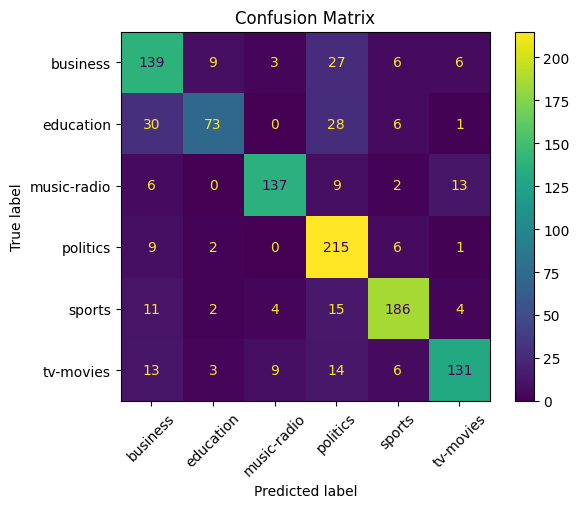

              precision    recall  f1-score   support

    business       0.67      0.73      0.70       190
   education       0.82      0.53      0.64       138
 music-radio       0.90      0.82      0.86       167
    politics       0.70      0.92      0.79       233
      sports       0.88      0.84      0.86       222
   tv-movies       0.84      0.74      0.79       176

    accuracy                           0.78      1126
   macro avg       0.80      0.76      0.77      1126
weighted avg       0.79      0.78      0.78      1126

Accuracy: 0.7824156305506217
Weigted F1 Score: 0.7804941320326805
Macro F1 Score: 0.7731730252314115
Micro F1 Score: 0.7824156305506217


In [ ]:
evaluate_model(nb)

In [ ]:
nv_val_scores   = cross_val_score(nb, X_train_vectorised, y_train_encoded, cv=cv, scoring="f1_macro")

Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Base logistic regression
base_log = LogisticRegression(class_weight="balanced")

<Figure size 1000x500 with 0 Axes>

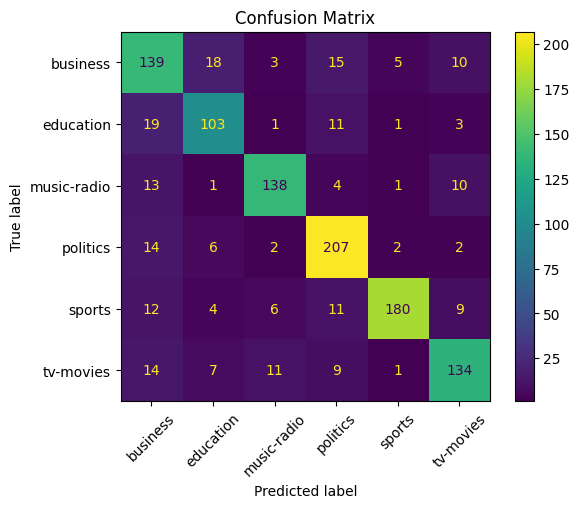

              precision    recall  f1-score   support

    business       0.66      0.73      0.69       190
   education       0.74      0.75      0.74       138
 music-radio       0.86      0.83      0.84       167
    politics       0.81      0.89      0.84       233
      sports       0.95      0.81      0.87       222
   tv-movies       0.80      0.76      0.78       176

    accuracy                           0.80      1126
   macro avg       0.80      0.79      0.80      1126
weighted avg       0.81      0.80      0.80      1126

Accuracy: 0.8001776198934281
Weigted F1 Score: 0.801804026133985
Macro F1 Score: 0.7960277820689484
Micro F1 Score: 0.8001776198934281


In [ ]:
evaluate_model(base_log)

In [ ]:
base_log_val_scores = cross_val_score(base_log, X_train_vectorised, y_train_encoded, cv=cv, scoring="f1_macro")

#  

In [ ]:
# Logistic regression cv
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
log_model = LogisticRegressionCV(cv=cv, Cs=10, class_weight="balanced", scoring='f1_weighted')

<Figure size 1000x500 with 0 Axes>

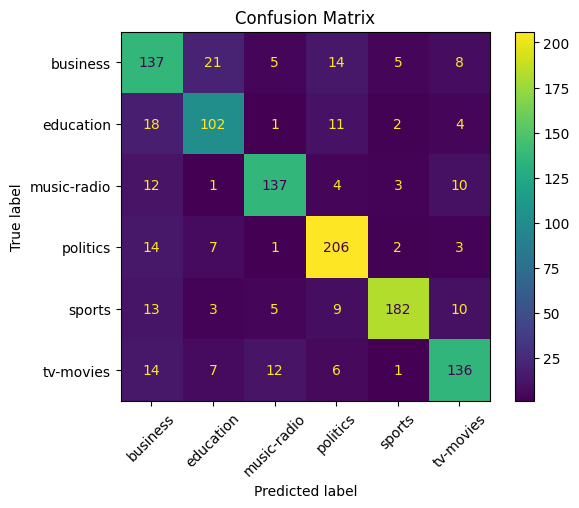

              precision    recall  f1-score   support

    business       0.66      0.72      0.69       190
   education       0.72      0.74      0.73       138
 music-radio       0.85      0.82      0.84       167
    politics       0.82      0.88      0.85       233
      sports       0.93      0.82      0.87       222
   tv-movies       0.80      0.77      0.78       176

    accuracy                           0.80      1126
   macro avg       0.80      0.79      0.79      1126
weighted avg       0.80      0.80      0.80      1126

Accuracy: 0.7992895204262878
Weigted F1 Score: 0.8008051977887485
Macro F1 Score: 0.7941260468221545
Micro F1 Score: 0.7992895204262878


In [ ]:
evaluate_model(log_model)

In [ ]:
log_cv_scores = cross_val_score(log_model, X_train_vectorised, y_train_encoded, cv=cv, scoring="f1_macro")

#  

Using SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
base_svc = SVC(class_weight="balanced")

<Figure size 1000x500 with 0 Axes>

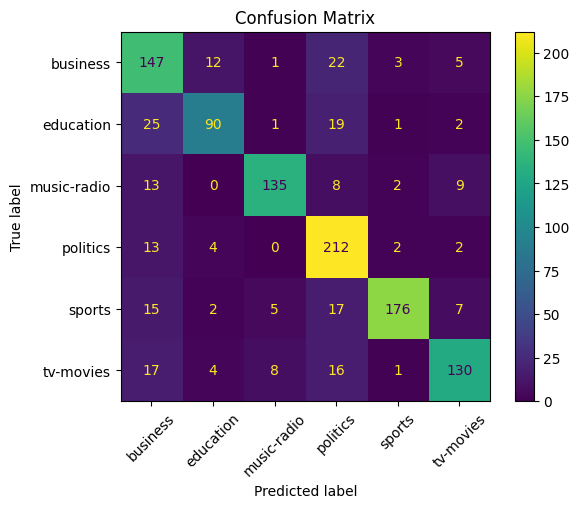

              precision    recall  f1-score   support

    business       0.64      0.77      0.70       190
   education       0.80      0.65      0.72       138
 music-radio       0.90      0.81      0.85       167
    politics       0.72      0.91      0.80       233
      sports       0.95      0.79      0.86       222
   tv-movies       0.84      0.74      0.79       176

    accuracy                           0.79      1126
   macro avg       0.81      0.78      0.79      1126
weighted avg       0.81      0.79      0.79      1126

Accuracy: 0.7904085257548845
Weigted F1 Score: 0.7924587765029328
Macro F1 Score: 0.787775408293352
Micro F1 Score: 0.7904085257548845


In [ ]:
evaluate_model(base_svc)

In [ ]:
base_svc_scores = cross_val_score(base_svc, X_train_vectorised, y_train_encoded, cv=cv, scoring="f1_macro")

#  

In [ ]:
# Cross validation with svc
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

In [ ]:
svc_grid = GridSearchCV(base_svc, param_grid, cv=cv, scoring='f1_weighted')

In [ ]:
svc_grid = GridSearchCV(base_svc, param_grid, cv=cv, scoring='f1_weighted')

<Figure size 1000x500 with 0 Axes>

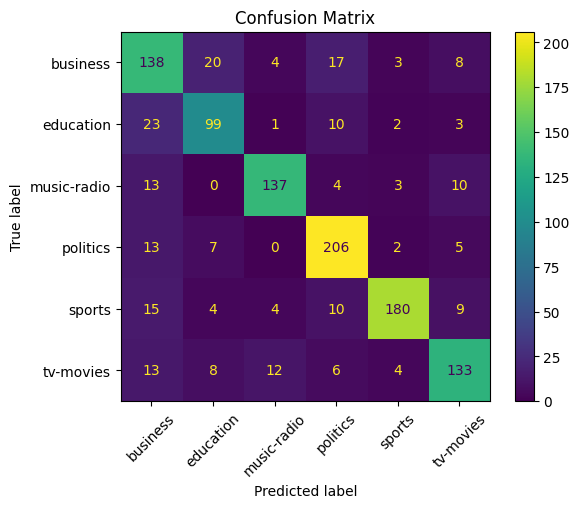

              precision    recall  f1-score   support

    business       0.64      0.73      0.68       190
   education       0.72      0.72      0.72       138
 music-radio       0.87      0.82      0.84       167
    politics       0.81      0.88      0.85       233
      sports       0.93      0.81      0.87       222
   tv-movies       0.79      0.76      0.77       176

    accuracy                           0.79      1126
   macro avg       0.79      0.79      0.79      1126
weighted avg       0.80      0.79      0.79      1126

Accuracy: 0.7930728241563055
Weigted F1 Score: 0.7948546796193446
Macro F1 Score: 0.7880544606264562
Micro F1 Score: 0.7930728241563055


In [ ]:
evaluate_model(svc_grid)

In [ ]:
svc_grid_val_scores = cross_val_score(svc_grid, X_train_vectorised, y_train_encoded, cv=cv, scoring='f1_macro')

#

In [ ]:
model_names = []
accuracy_scores = []
micro_f1_scores = []
macro_f1_scores = []
weighted_f1_scores = []

def evaluate_models(model_name, model):
    y_pred = model.predict(X_test_vectorised)

    model_names.append(model_name)

    accuracy_score_ = round(accuracy_score(y_test_encoded, y_pred),2)
    accuracy_scores.append(accuracy_score_)

    micro_f1 = round(f1_score(y_test_encoded, y_pred, average='micro'),2)
    micro_f1_scores.append(micro_f1)

    macro_f1 = round(f1_score(y_test_encoded, y_pred, average='macro'),2)
    macro_f1_scores.append(macro_f1)

    weighted_f1 = round(f1_score(y_test_encoded, y_pred, average='weighted'), 2)
    weighted_f1_scores.append(weighted_f1)

#  

Final Model Comparison

In [ ]:
models = {
    "NVB": nb,
    "Base log": base_log,
    "Log CV": log_model,
    "Base SVC": base_svc,
    "SVC CV": svc_grid,
}

In [ ]:
for model_name, model in models.items():
  evaluate_models(model_name, model)

In [ ]:
model_comparison = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy_scores,
    "Micro F1": micro_f1_scores,
    "Macro F1": macro_f1_scores,
    "Weighted F1": weighted_f1_scores
    })

In [ ]:
model_comparison

,Model,Accuracy,Micro F1,Macro F1,Weighted F1
0,NVB,0.78,0.78,0.77,0.78
1,Base log,0.80,0.80,0.80,0.80
2,Log CV,0.80,0.80,0.79,0.80
3,Base SVC,0.79,0.79,0.79,0.79
4,SVC CV,0.79,0.79,0.79,0.79


In [ ]:
model_comparison

,Model,Accuracy,Micro F1,Macro F1,Weighted F1
0,NVB,0.78,0.78,0.77,0.78
1,Base log,0.80,0.80,0.80,0.80
2,Log CV,0.80,0.80,0.79,0.80
3,Base SVC,0.79,0.79,0.79,0.79
4,SVC CV,0.79,0.79,0.79,0.79


In [ ]:
print(f"Naive Bayes Cross_Validation Score: {nv_val_scores}")
print(f"Base Logistic Regression Cross_Validation Score: {base_log_val_scores}")
print(f"Logistic Regression Cross_Validation Score: {log_cv_scores}")
print(f"SVC Cross_Validation Score: {svc_grid_val_scores}")
print(f"Base SVC Cross_Validation Score: {base_svc_scores}")

Naive Bayes Cross_Validation Score: [0.76198135 0.75957215 0.75167366 0.74435095 0.72085626]
Base Logistic Regression Cross_Validation Score: [0.78846255 0.7724199  0.77755243 0.75692598 0.7515201 ]
Logistic Regression Cross_Validation Score: [0.79097093 0.78204979 0.77658245 0.76298276 0.75505012]
SVC Cross_Validation Score: [0.77071958 0.76823315 0.76010248 0.75310968 0.74741998]
Base SVC Cross_Validation Score: [0.77528447 0.76125057 0.75680636 0.75581241 0.7341656 ]


# Final Model Training

In [ ]:
vectoriser = TfidfVectorizer()

In [ ]:
X_vectorised = vectoriser.fit_transform(X)

In [ ]:
X

,headline
0,total ban use ethnic slur nairaland
1,uk court reject ozekhome request transfer gen ...
2,going back biafra massob declares year struggle
3,oseni rufai call double standard tinubu admini...
4,bandit openly display ammunition peace meeting...
...,...
5623,upcoming artist release new song nigeria tinubu
5624,audiomack
5625,new music friday asake wave ft central cee fre...
5626,matthew eyito jesus lyric


In [ ]:
final_model = LogisticRegression(class_weight="balanced").fit(X_vectorised, y)

In [ ]:
print(X_vectorised.shape, y.shape)

(5628, 8736) (5628,)


In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, "final_model.joblib")

['final_model.joblib']

In [ ]:
joblib.dump(vectoriser, "vectoriser.joblib")

['vectoriser.joblib']

In [ ]:
from google.colab import files

In [ ]:
files.download("final_model.joblib")
files.download("vectoriser.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>